# Previsão de Câncer de Pulmão Utilizando Técnicas de Machine Learning

Integrantes do grupo:


Bárbara Carvalho \
Bruno Xavier \
Maria Inês Arruda Gonçalves\
Murilo Pereira \
Rafael Carvalho Zucchi de Jesus\
Paola Rodrigues

O dataset utilizado foi retirado do Keagle e pode ser encontrado acessando o link: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download 

**Descrição do Dataset**

Gender: M (masculino), F (feminino)

Age: idade do paciente

Smoking = Fumante: SIM=2 , NÃO=1.

Yellow_fingers = Dedos amarelados: SIM=2 , NÃO=1.

Anxiety = Ansiedade: SIM=2, NÃO=1.

Peer_pressure: SIM=2 , NÃO=1.

Chronic_Desease = Doença Crônica: SIM=2 , NÃO=1.

Fatigue = Fadiga: SIM=2 , NÃO=1.

Allergy = Alergia: SIM=2 , NÃO=1.

Wheezing = Chiado: SIM=2 , NÃO=1.

Alcohol Consuming = Consumo de Álcool: SIM=2 , NÃO=1.

Coughing = Tosse: SIM=2 , NÃO=1.

Shortness of breath = Falta de ar: SIM=2 , NÃO=1.

Swallowing Difficulty = Dificuldade de deglutição: SIM=2 , NÃO=1.

Chest Pain = Dor no peito: SIM=2 , NÃO=1.

Lung Cancer = Câncer de Pulmão: SIM, NÃO



**Lista de Dicas/Técnincas:**
1. Mudando de Categórico para Numérico
2. Correlação das Features com o que queremos Prever 
3. Árvore de Decisão - É um algoritmo de classificação e regressão que estabelece nós que se relacionam entre si por uma hierarquia
4. Divisão dataset Train/Test
5. Balanceamento do Dataset
6. Random Forest
7. KNN - Algoritmo que classifica cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. 
8. Conclusão

Trabalho Machine Learning

In [ ]:
#Bibliotecas Utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE 


# Análise Exploratória

In [ ]:
df = pd.read_csv('survey lung cancer.csv')
df.head()

#Sim = 2
#Não = 1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Verificando os tipos e se há dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#Verificando a quantidade de linhas e colunas
df.shape

(309, 16)

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#Descrevendo os dados 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


Nosso dataset contem 16 colunas e 309 linhas, sendo 2 colunas do tipo objeto e 14 colunas do tipo inteiro. Não contem dados nulos

In [ ]:
# Verificando os valores únicos da coluna lung_cancer
df['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
# Verificando a quantidade de pacientes com cancer e sem cancer de pulmão
df['LUNG_CANCER'].value_counts(normalize=True)

YES    0.873786
NO     0.126214
Name: LUNG_CANCER, dtype: float64

#1. Mudando de Categórico para Numérico

In [ ]:
# Alterando os valores únicos da coluna para números igual as outras para trabalharmos melhor
df['LUNG_CANCER'] = np.where(df['LUNG_CANCER'] == 'YES', 2, 1)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [ ]:
# Verificando os valores únicos da coluna gender

df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
# Verificando a quantidade de pacientes de acordo com  o gênero

df['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [ ]:
# Alterando os valores únicos da coluna para números para trabalharmos melhor
df['GENDER'] = np.where(df['GENDER'] == 'M',1,0)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


Alteramos duas colunas para inteiro para trabalharmos melhor com as features. A coluna lung_cancer ficou YES=2, NO=1 e a coluna gender ficou M=1 e F=0

#2.Correlação das Features com o que queremos Prever 

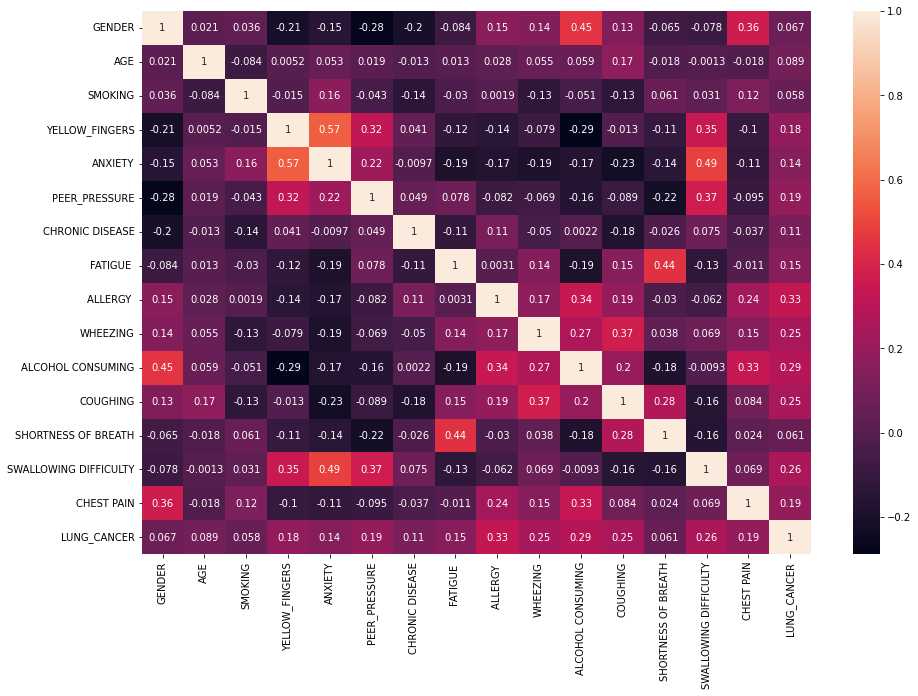

In [ ]:
#Vamos fazer um mapa para verificar as correlações entre os parâmetros
correlacao = df.corr()
ax = sns.heatmap(correlacao, annot = True)
ax.figure.set_size_inches(15,10)

In [ ]:
df['SMOKING'].value_counts(normalize = True)

2    0.563107
1    0.436893
Name: SMOKING, dtype: float64

Surpreendentemente a feature fumar não tem uma grande correlação com o câncer de pulmão, uma das features que mais aparecem tendo correlação é a alergia.  Não se sabe se isso se deve ao tamanho do nosso dataset ou por outro motivo.

#3.Iniciando o processo de classificação por Árvore de Decisão

In [ ]:
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

#4. Divisão dataset Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
y_train.value_counts(normalize=True)
                                                   

2    0.874494
1    0.125506
Name: LUNG_CANCER, dtype: float64

87,45% de pessoas com câncer e 12,55% de pessoas sem câncer

In [ ]:
#Definindo o modelo de classificação
modelo_class = DecisionTreeClassifier(random_state=42)

In [ ]:
#Treinando o modelo
modelo_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = modelo_class.predict(X_test)

In [ ]:
y_pred_train = modelo_class.predict(X_train)

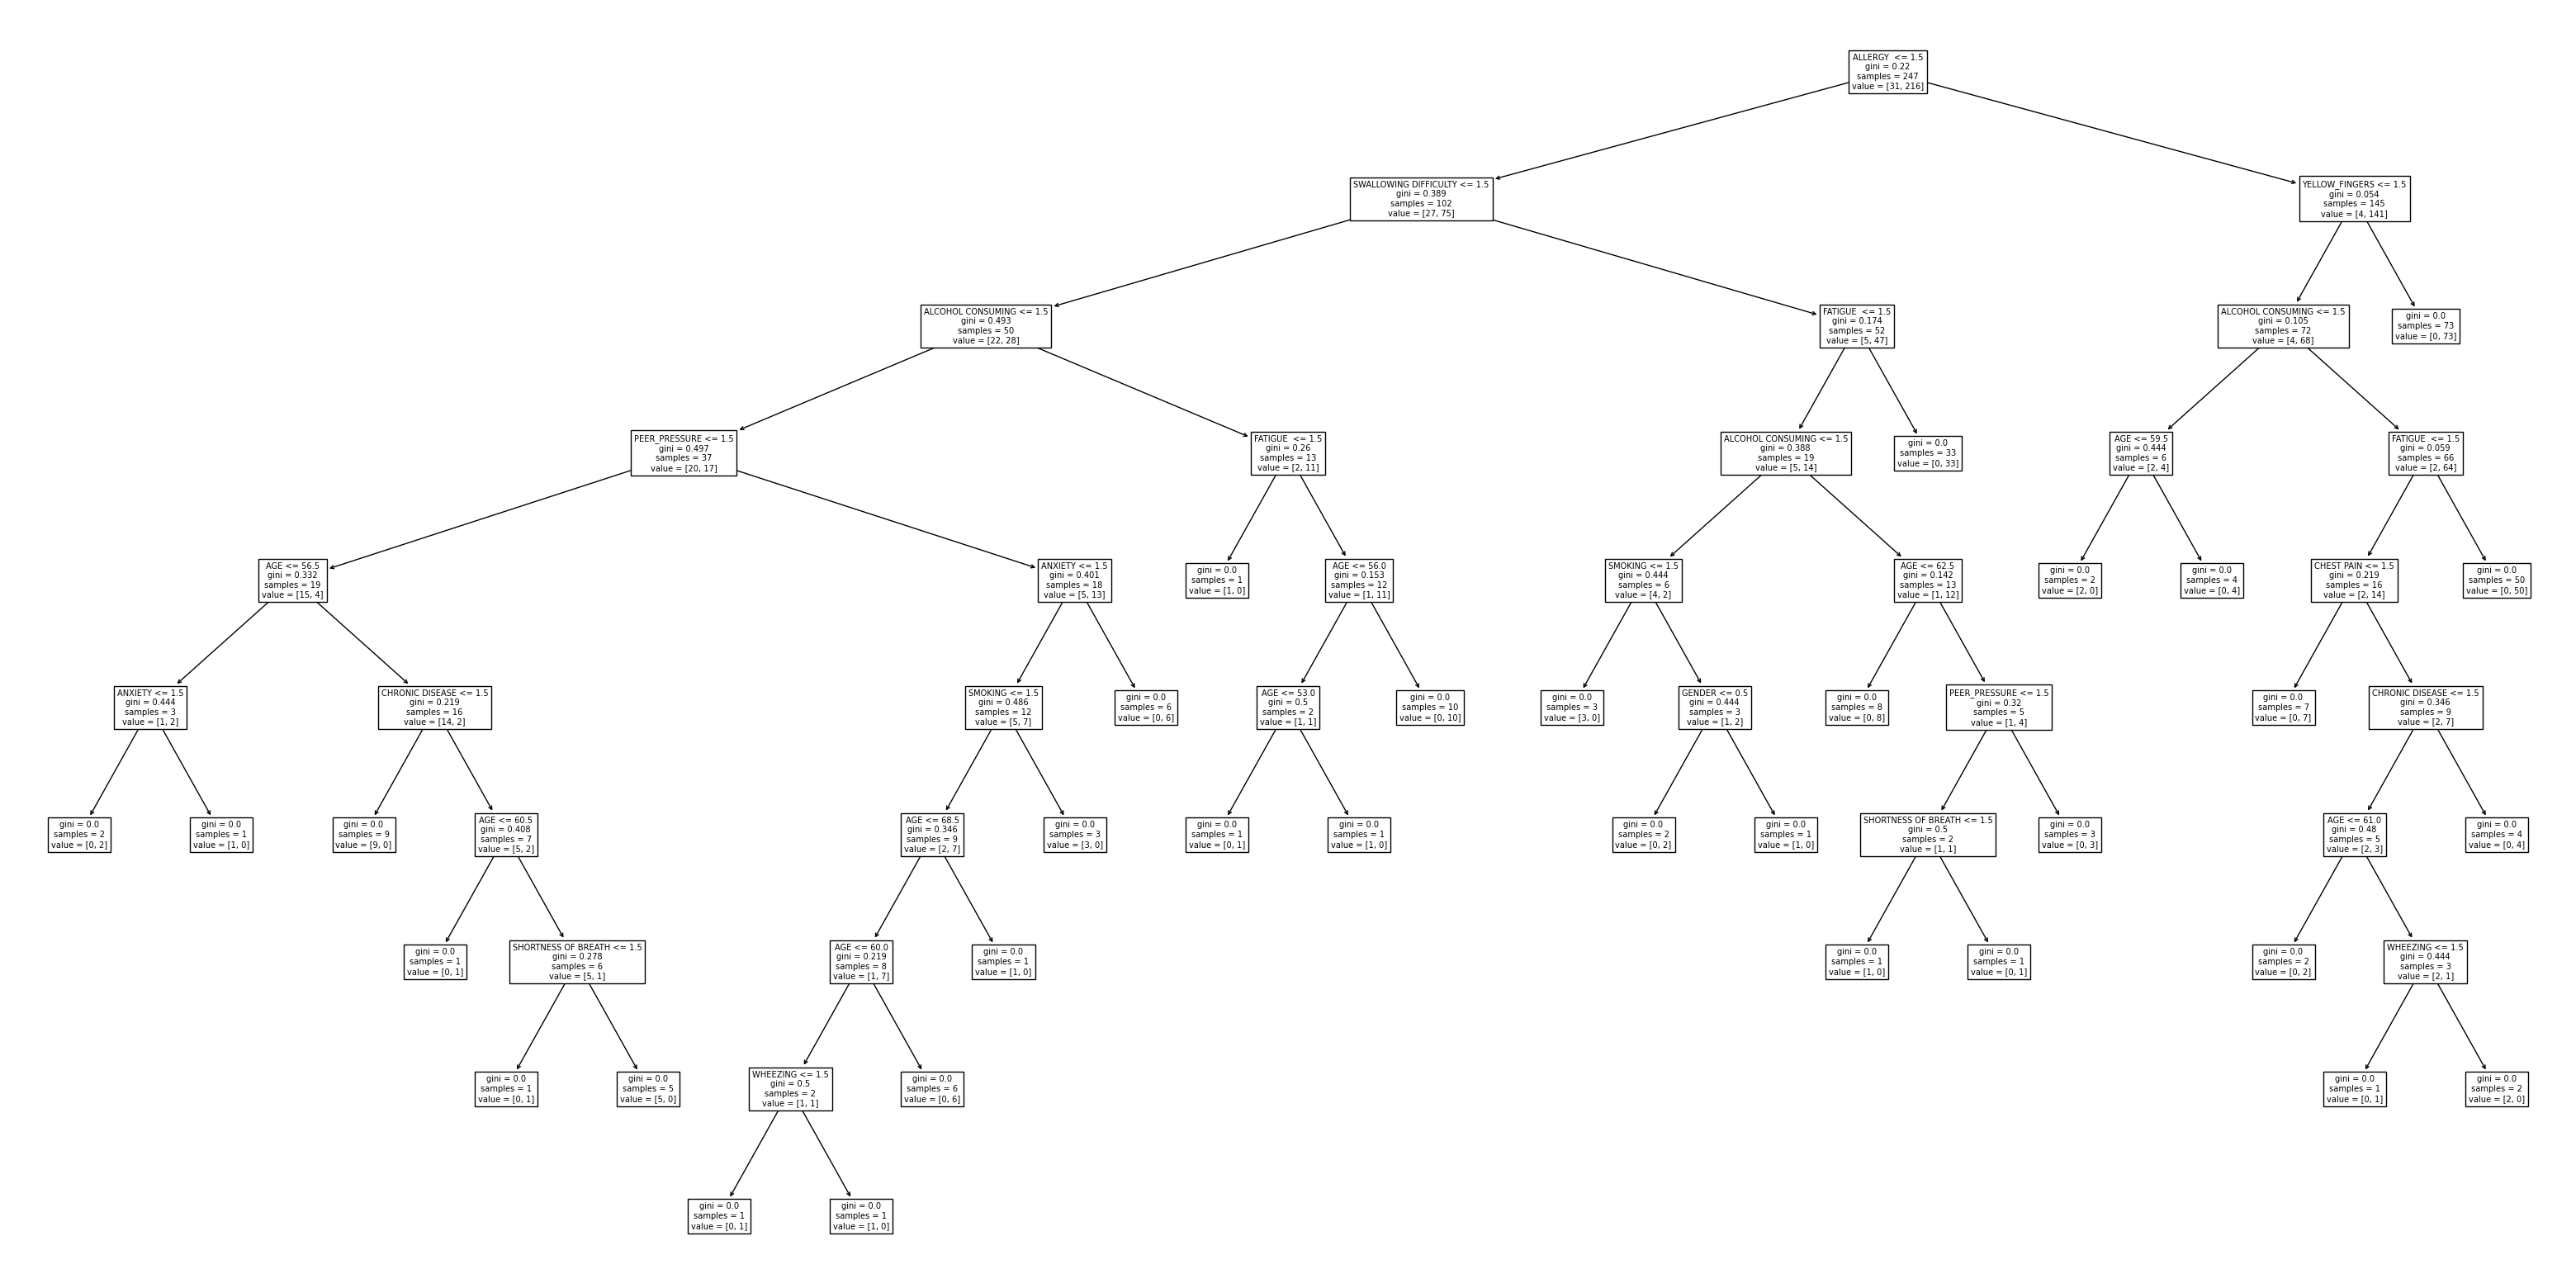

In [ ]:
#Plotando a árvore de decisão
plt.figure(figsize=(40, 20))
tree.plot_tree(modelo_class, feature_names=X_train.columns)
plt.show()

In [ ]:
# Verifcando as métricas do teste
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.88      0.74         8
           2       0.98      0.93      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.90      0.84        62
weighted avg       0.94      0.92      0.92        62



#Vemos que não temos uma precisão muito boa, um dos motivos que isso acontece é devido ao desbalanceamento dos dados, pois temos uma proporção de 87,45% de pessoas com câncer e 12,55% de pessoas sem câncer, então o algoritmo saber prever muito bem casos de câncer, mas não tão bem casos de não ter câncer.. 

In [ ]:
# Veirifcando as métricas de treino
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       216

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



#Ao verificar as métricas acima, vemos que o modelo "overfitou", ou seja, decorou as informações. Uma das maneiras de melhorar o modelo é podar a árvore, para isso vamos deixar a profundidade máxima da árvore em 4, pois a profundidade original é 10.

In [ ]:
#Fazendo o modelo da árvore podada
modelo_podado = DecisionTreeClassifier(random_state=42, max_depth=4)
modelo_podado.fit(X_train, y_train)
y_pred = modelo_podado.predict(X_test)

In [ ]:
#Veirifcando as métricas de treino para verificar se o overfit diminuiu
y_pred_train = modelo_podado.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.76      0.71      0.73        31
           2       0.96      0.97      0.96       216

    accuracy                           0.94       247
   macro avg       0.86      0.84      0.85       247
weighted avg       0.93      0.94      0.93       247



In [ ]:
# Verifcando as métricas do teste após podar a árvore
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.75      0.60         8
           2       0.96      0.89      0.92        54

    accuracy                           0.87        62
   macro avg       0.73      0.82      0.76        62
weighted avg       0.90      0.87      0.88        62



#Verificamos acima que o overfit diminuiu bastante

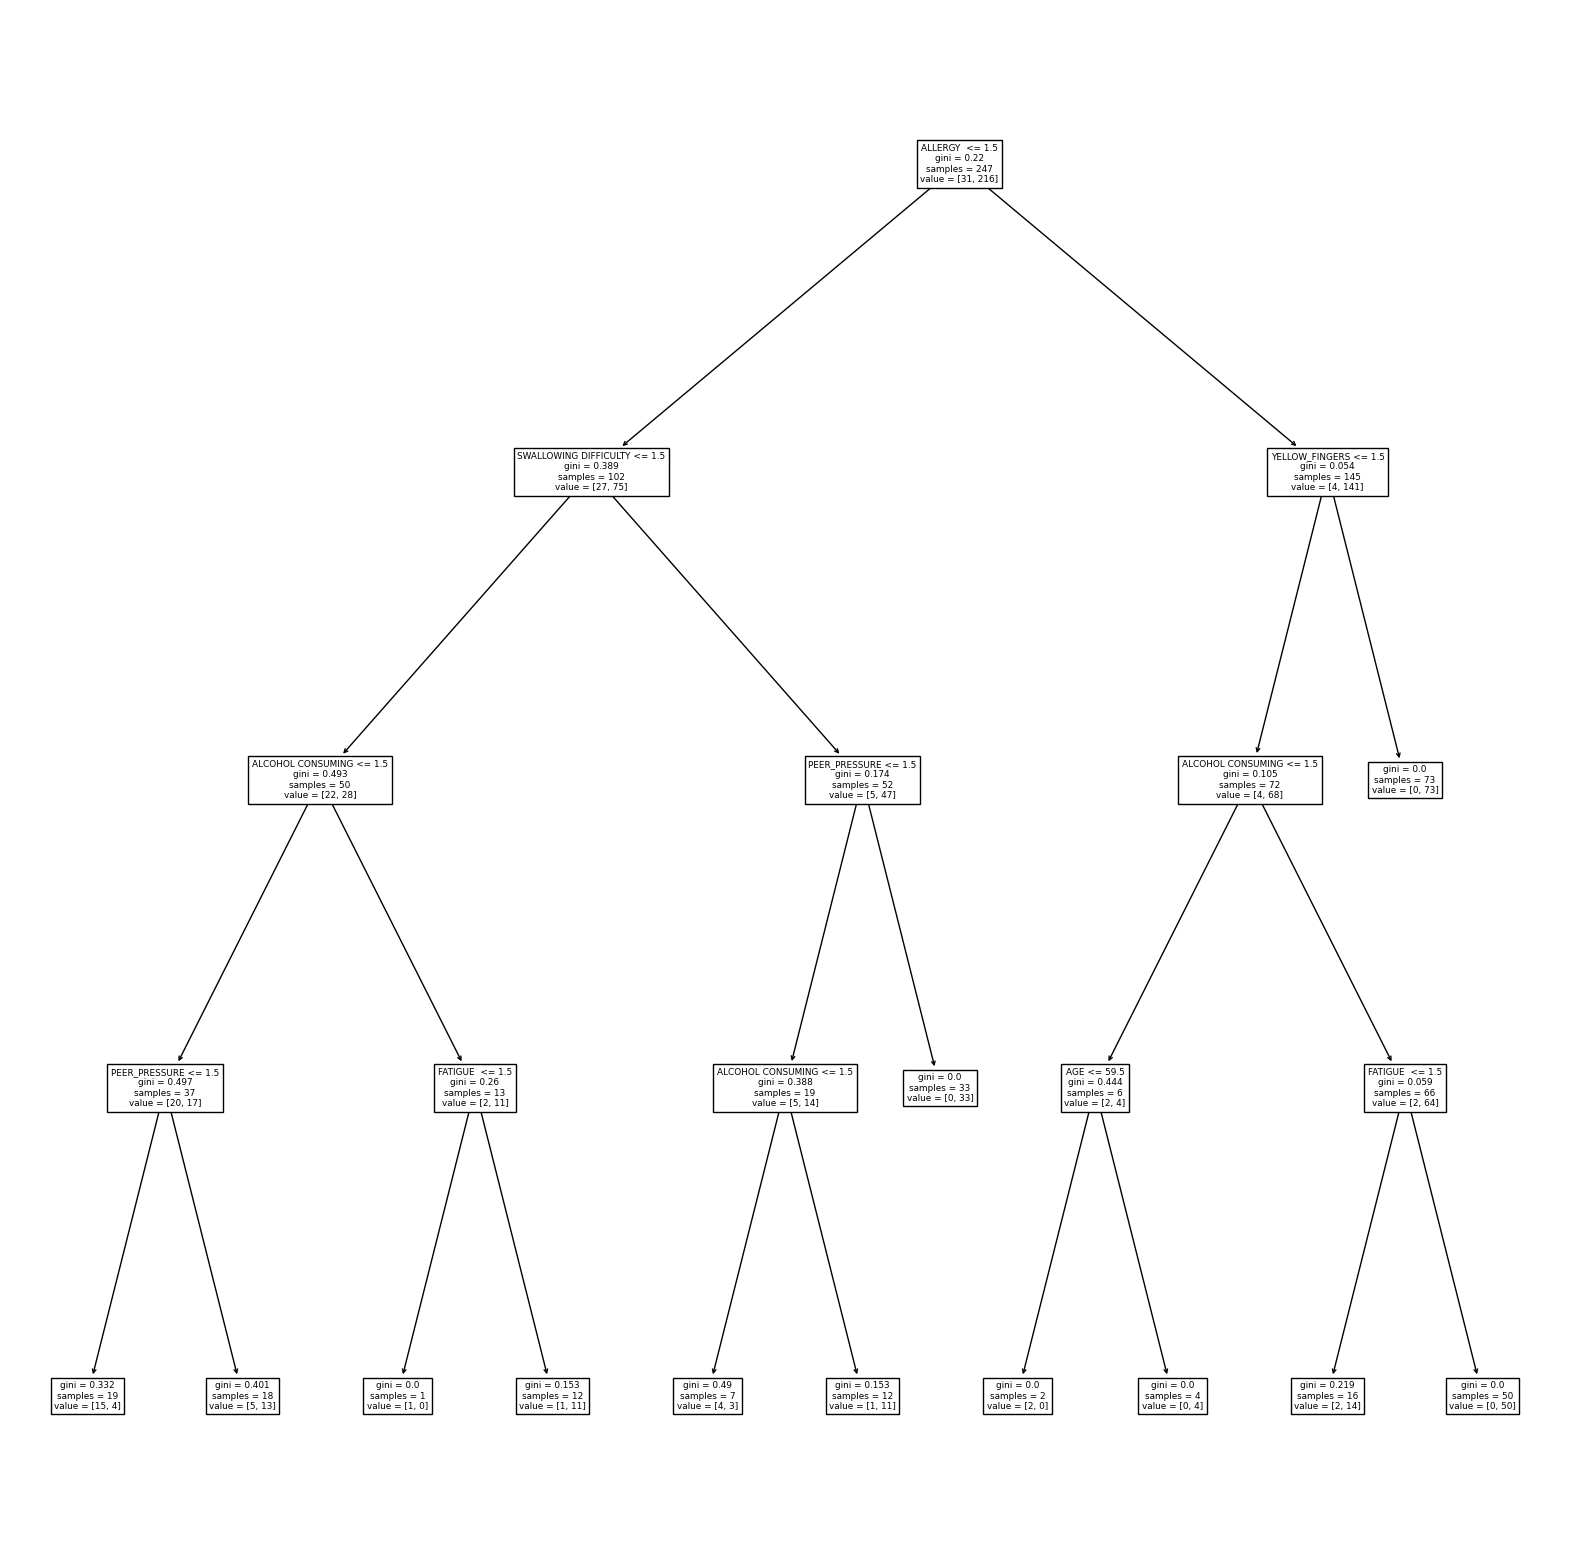

In [ ]:
#Plotando a árvore podada

plt.figure(figsize=(20, 20))
tree.plot_tree(modelo_podado, feature_names=X_train.columns)
plt.show()

#5. Balanceamento do Dataset

Devido ao desbalanceamento dos dados, utilizamos de uma outra maneira para fazermos a árvore de decisão com os dados balanceados.

In [ ]:
X_train.shape

(247, 15)

#6. Random Forest

In [ ]:
# Adicionando novas variáveis, X_over = features e y_over = o que queremos prever
smote = SMOTE(sampling_strategy = 'minority', random_state=42)
X_over, y_over = smote.fit_resample(X_train,y_train)

In [ ]:
X_over.shape

(432, 15)

In [ ]:
np.unique(y_train, return_counts=True)

(array([1, 2]), array([ 31, 216]))

In [ ]:
np.unique(y_over, return_counts=True)

(array([1, 2]), array([216, 216]))

In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.2, random_state=42)
X_train_over.shape,X_test_over.shape

((345, 15), (87, 15))

In [ ]:
random_forest_lung_over = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=5)
random_forest_lung_over.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_over = random_forest_lung_over.predict(X_test_over)
accuracy_score(y_test_over,y_pred_over)

0.9770114942528736

In [ ]:
print(classification_report(y_test_over,y_pred_over))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



In [ ]:
y_pred_train_over = random_forest_lung_over.predict(X_train_over)
print(classification_report(y_train_over,y_pred_train_over))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97       171
           2       0.96      0.98      0.97       174

    accuracy                           0.97       345
   macro avg       0.97      0.97      0.97       345
weighted avg       0.97      0.97      0.97       345



#7. Iniciando o processo de classificação por KNN/Standardization

In [ ]:
scaler_train = StandardScaler()
X_train_std = scaler_train.fit_transform(X_train_over)

In [ ]:
scaler_test = StandardScaler()
X_test_std = scaler_test.fit_transform(X_test_over)

In [ ]:
modelo_KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
modelo_KNN.fit(X_train_std, y_train_over)

KNeighborsClassifier()

In [ ]:
y_pred_knn = modelo_KNN.predict(X_test_std)

In [ ]:
print(classification_report(y_test_over, y_pred_knn))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97        45
           2       0.95      0.98      0.96        42

    accuracy                           0.97        87
   macro avg       0.97      0.97      0.97        87
weighted avg       0.97      0.97      0.97        87



In [ ]:
y_pred_train_knn = modelo_KNN.predict(X_train_std)

In [ ]:
print(classification_report(y_train_over, y_pred_train_knn))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       171
           2       0.97      0.96      0.96       174

    accuracy                           0.96       345
   macro avg       0.96      0.96      0.96       345
weighted avg       0.96      0.96      0.96       345



#8. Conclusão

Após realizarmos o balanceamento da amostra tivemos bons resultados.